In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt


(0.8, 1.0) (0.8, 1.0)


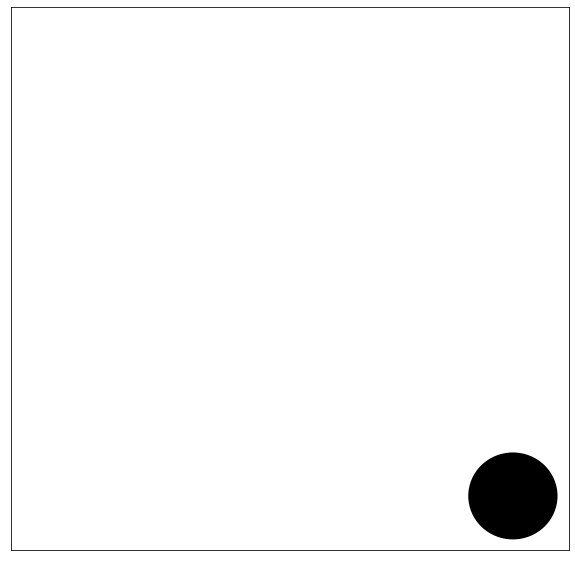

In [35]:
# figure wrappers and canvas drawing functions
def draw_canvas(height=10, width=10):
    """Wrapper function to return a figure"""
    fig = plt.figure(figsize=(width, height), 
                        facecolor='white', edgecolor='black')
    ax = fig.add_subplot(1, 1, 1)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return fig, ax

def select_subregion(fig, section, nrows=5, ncols=5):
    """Splits each canvas into square rastered portions and returns limits of one of them."""
    row_chunk_size = 1/nrows # think this is continuous
    col_chunk_size = 1/ncols
    row =  section // ncols
    col = section % ncols
    rowSpan = (row_chunk_size * row, row_chunk_size*(row+1))
    colSpan = (col_chunk_size * col, col_chunk_size*(col+1))
    return rowSpan, colSpan

def draw_rectangle(ax, rowSpan, colSpan, fill=True, color='k', padding=0.02):
    """Takes a figure axis and position, and draws a rectangle there. Converts to matrix-style positioning"""
    r = plt.Rectangle((colSpan[0] + padding, (1-rowSpan[1]+padding)),
                      colSpan[1] - colSpan[0] - 2*padding,
                      rowSpan[1] - rowSpan[0] - 2*padding,
                      fill=fill, fc=color) # first arguments are bottom left hand corner, then width, THEN height
    ax.add_patch(r)
    plt.show()
    
def draw_circle(ax, rowSpan, colSpan, fill=True, color='k', padding=0.02):
    """Takes a figure axis and position, and draws a rectangle there. Converts to matrix positioning"""
    c = plt.Circle((np.mean(colSpan), 1-np.mean(rowSpan)), 
                   radius=((rowSpan[1]-rowSpan[0])/2) - padding,
                  fill=fill, fc=color)
    ax.add_patch(c)
    plt.show()
    

f, ax = draw_canvas()
rS, cS = select_subregion(f, 0)
print(rS, cS)
draw_circle(ax, rS, cS)
